In [1]:
import sys
sys.path.append('../../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.io import mmread
from scipy import sparse as sp
import freeqsw as qsw
import h5py


In [2]:
results_df = pd.read_csv('Application_2_outter.csv',encoding = "ISO-8859-1")

In [3]:
results_df.keys()

Index(['graph', 'ID', 'set', 'G', 'omega', 'integrated_populations',
       'integrated_coherences', 'final_sink_pop', 'time', 't2_population'],
      dtype='object')

In [5]:
results_df['integrated_coherences']

0        0.746112
1        0.578904
2        0.000000
3      510.731086
4        5.192636
5        0.000000
6     2563.415675
7       12.261003
8        0.000000
9      502.196422
10       2.859873
11       0.000000
12    2545.935195
13       9.060020
14       0.000000
15    5965.463152
16      18.019107
17       0.000000
18    1114.216287
19       4.849721
20       0.000000
21    3606.336292
22      12.100658
23       0.000000
24    7549.899266
25      22.635635
26       0.000000
27    1503.925473
28       6.439202
29       0.000000
30    4219.957602
31      14.755127
32       0.000000
33    8441.980954
34      27.366152
35       0.000000
Name: integrated_coherences, dtype: float64

A [ 55.87768555 299.92675781 664.91699219]
[436.7558711086838, 121.6931216931217]
D [ 300.04882812  665.95458984 1322.63183594]
[121.94873881204231, 98.60691045733664]


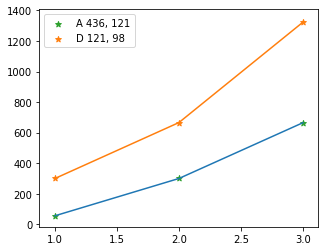

In [33]:
color=[u'#2ca02c', u'#ff7f0e',  u'#1f77b4', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)

omega_df = results_df.loc[results_df['omega']==0.1]
indx = 0
for set in ['A', 'D']:
    print(set, omega_df.loc[omega_df['set'] == set]['time'].values)
    z = np.polyfit(omega_df.loc[omega_df['set'] == set]['G'], omega_df.loc[omega_df['set'] == set]['time'],2)
    fit = np.poly1d(z) 
    #print(set, z)
    x = np.linspace(1, 3, 3)
    #print(omega_df.loc[omega_df['set'] == set]['time'].values)
    ax.plot(x,fit(x))
    diffs = np.diff(omega_df.loc[omega_df['set'] == set]['time'].values)
    #print(diffs)
    set_vals = omega_df.loc[omega_df['set'] == set]['time'].values
    per_diff = [100*(set_vals[i+1] - set_vals[i])/set_vals[i] for i in range(len(diffs))]
    print(per_diff)
    for G, time, sink in zip(omega_df.loc[omega_df['set'] == set]['G'], omega_df.loc[omega_df['set'] == set]['time'], omega_df.loc[omega_df['set'] == set]['final_sink_pop']):
        if sink < 0.9999:
            marker = '+'
        else:
            marker = '*'
        if G == 1:
            ax.scatter(G, time, marker = marker, c=color[indx], label = set + ' ' + str(int(per_diff[0])) +', ' + str(int(per_diff[1])))
        else:
            ax.scatter(G, time, marker = marker, c=color[indx])

    indx += 1
    
plt.legend()

[433.79578246392896, 123.61991891048966]
[123.14032557181125, 99.18736725459415]


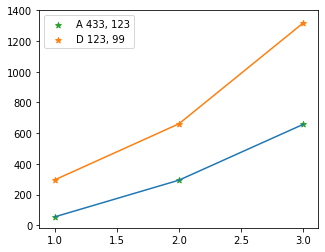

In [7]:
color=[u'#2ca02c', u'#ff7f0e',  u'#1f77b4', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)

omega_df = results_df.loc[results_df['omega']==0.1]
indx = 0
for set in ['A', 'D']:
    z = np.polyfit(omega_df.loc[omega_df['set'] == set]['G'], omega_df.loc[omega_df['set'] == set]['time'],2)
    fit = np.poly1d(z) 
    #print(set, z)
    x = np.linspace(1, 3, 3)
    #print(omega_df.loc[omega_df['set'] == set]['time'].values)
    ax.plot(x,fit(x))
    diffs = np.diff(omega_df.loc[omega_df['set'] == set]['time'].values)
    #print(diffs)
    set_vals = omega_df.loc[omega_df['set'] == set]['time'].values
    per_diff = [100*(set_vals[i+1] - set_vals[i])/set_vals[i] for i in range(len(diffs))]
    print(per_diff)
    for G, time, sink in zip(omega_df.loc[omega_df['set'] == set]['G'], omega_df.loc[omega_df['set'] == set]['time'], omega_df.loc[omega_df['set'] == set]['final_sink_pop']):
        if sink < 0.9999:
            marker = '+'
        else:
            marker = '*'
        if G == 1:
            ax.scatter(G, time, marker = marker, c=color[indx], label = set + ' ' + str(int(per_diff[0])) +', ' + str(int(per_diff[1])))
        else:
            ax.scatter(G, time, marker = marker, c=color[indx])

    indx += 1
    
plt.legend()

In [243]:
file = qsw.io.File('Application_2/locals/D3')

In [244]:
file.list_series()

series name    |initial state  |omega          |steps          |t1             |t2             
-----------------------------------------------------------------------------------------------
D3_0.0even     |rho 1          |0.0            |65536          |0.0            |2000.0         
D3_0.1even     |rho 1          |0.1            |65536          |0.0            |2000.0         
D3_1.0even     |rho 1          |1.0            |65536          |0.0            |2000.0         


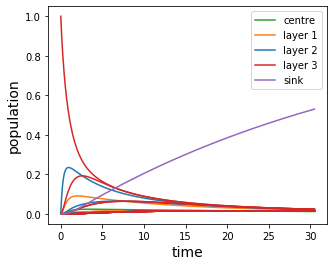

In [245]:
color=[u'#2ca02c', u'#ff7f0e',  u'#1f77b4', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
pops = qsw.measure.populations(file.series('D3_1.0even'))
font = 14
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
#ax.set_yscale('log')

h = (2000)/float(2**16)

t = np.arange(0,2000 + h, h)

color_indx = [1,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5]

labels = ['centre', 'layer 1', 'layer 2', 'layer 3']
sec = 1000
indx = 0
f1 = True
f2 = True
f3 = True
f4 = True
f5 = True

for i in range(pops.shape[1]):
    if i == 0:
        if f1:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[0], label = labels[0])
            f1 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[0])
    elif (i == 1) or (i<= 4):
        if f2:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[1], label = labels[1])
            f2 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[1])
    elif (i == 5) or (i <= 12):
        if f3:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[2], label = labels[2])
            f3 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[2])
    elif (i == 3) or (i <= 28):
        if f4:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[3], label = labels[3])
            f4 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[3])
    elif i == 29:
        ax.plot(t[0:sec], pops[0:sec,i], c = color[4], label = 'sink')
        indx += 1
    else:
        ax.plot(t[0:sec], pops[0:sec,i])



plt.xlabel(r'time',fontsize=font)
plt.ylabel(r'population',fontsize=font)
plt.savefig("D3_1.0even_A.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)
plt.legend()
#ax.set_ylim(0.001,0.002)
#ax.set_xlim(100,140)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:58: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


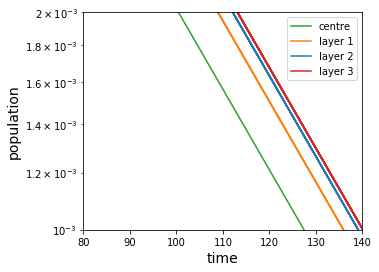

In [246]:
font = 14
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
ax.set_yscale('log')

h = (2000)/float(2**16)

t = np.arange(0,2000 + h, h)

color_indx = [1,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5]

labels = ['centre', 'layer 1', 'layer 2', 'layer 3']
sec = 7000
indx = 0
f1 = True
f2 = True
f3 = True
f4 = True
f5 = True

for i in range(pops.shape[1]):
    if i == 0:
        if f1:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[0], label = labels[0])
            f1 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[0])
    elif (i == 1) or (i<= 4):
        if f2:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[1], label = labels[1])
            f2 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[1])
    elif (i == 5) or (i <= 12):
        if f3:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[2], label = labels[2])
            f3 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[2])
    elif (i == 3) or (i <= 28):
        if f4:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[3], label = labels[3])
            f4 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[3])
    elif i == 29:
        ax.plot(t[0:sec], pops[0:sec,i], c = color[4])
        indx += 1
    else:
        ax.plot(t[0:sec], pops[0:sec,i])

plt.xlabel(r'time',fontsize=font)
plt.ylabel(r'population',fontsize=font)
    
plt.legend()
ax.set_ylim(0.001,0.002)
ax.set_xlim(80,140)
plt.savefig("D3_1.0even_B.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)


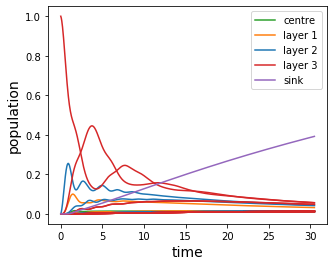

In [247]:
color=[u'#2ca02c', u'#ff7f0e',  u'#1f77b4', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
pops = qsw.measure.populations(file.series('D3_0.1even'))
font = 14
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
#ax.set_yscale('log')

h = (2000)/float(2**16)

t = np.arange(0,2000 + h, h)

color_indx = [1,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5]

labels = ['centre', 'layer 1', 'layer 2', 'layer 3']
sec = 1000
f1 = True
f2 = True
f3 = True
f4 = True
f5 = True

for i in range(pops.shape[1]):
    if i == 0:
        if f1:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[0], label = labels[0])
            f1 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[0])
    elif (i == 1) or (i<= 4):
        if f2:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[1], label = labels[1])
            f2 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[1])
    elif (i == 5) or (i <= 12):
        if f3:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[2], label = labels[2])
            f3 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[2])
    elif (i == 3) or (i <= 28):
        if f4:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[3], label = labels[3])
            f4 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[3])
    elif i == 29:
        ax.plot(t[0:sec], pops[0:sec,i], c = color[4], label = 'sink')
        indx += 1
    else:
        ax.plot(t[0:sec], pops[0:sec,i])


plt.xlabel(r'time',fontsize=font)
plt.ylabel(r'population',fontsize=font)
    
plt.legend()
plt.savefig("D3_0.1even_A.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)

#ax.set_ylim(0.001,0.002)
#ax.set_xlim(100,140)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:55: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


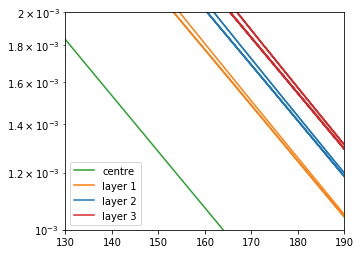

In [250]:
font = 14
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
ax.set_yscale('log')

h = (2000)/float(2**16)

t = np.arange(0,2000 + h, h)

color_indx = [1,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5]

labels = ['centre', 'layer 1', 'layer 2', 'layer 3']
indx = 0
sec = 7000
f1 = True
f2 = True
f3 = True
f4 = True
f5 = True

for i in range(pops.shape[1]):
    if i == 0:
        if f1:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[0], label = labels[0])
            f1 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[0])
    elif (i == 1) or (i<= 4):
        if f2:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[1], label = labels[1])
            f2 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[1])
    elif (i == 5) or (i <= 12):
        if f3:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[2], label = labels[2])
            f3 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[2])
    elif (i == 3) or (i <= 28):
        if f4:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[3], label = labels[3])
            f4 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[3])
    elif i == 29:
        ax.plot(t[0:sec], pops[0:sec,i], c = color[4])
        indx += 1
    else:
        ax.plot(t[0:sec], pops[0:sec,i])
    
plt.legend()
ax.set_ylim(0.001,0.002)
ax.set_xlim(130,190)
plt.savefig("D3_0.1even_B.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)


In [4]:
file = qsw.io.File('Application_2/locals/A3')

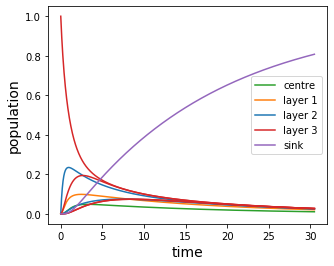

In [7]:
color=[u'#2ca02c', u'#ff7f0e',  u'#1f77b4', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
pops = qsw.measure.populations(file.series('A3_1.0even'))
font = 14
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
#ax.set_yscale('log')

h = (2000)/float(2**16)

t = np.arange(0,2000 + h, h)

labels = ['centre', 'layer 1', 'layer 2', 'layer 3']
indx = 0
sec = 1000
f1 = True
f2 = True
f3 = True
f4 = True
f5 = True

for i in range(pops.shape[1]):
    if i == 0:
        if f1:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[0], label = labels[0])
            f1 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[0])
    elif (i == 1):
        if f2:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[1], label = labels[1])
            f2 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[1])
    elif (i == 2) or (i <= 3):
        if f3:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[2], label = labels[2])
            f3 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[2])
    elif (i == 4) or (i <= 7):
        if f4:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[3], label = labels[3])
            f4 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[3])
    elif i == 8:
        ax.plot(t[0:sec], pops[0:sec,i], c = color[4], label = 'sink')
        indx += 1
    else:
        ax.plot(t[0:sec], pops[0:sec,i])


plt.xlabel(r'time',fontsize=font)
plt.ylabel(r'population',fontsize=font)
    
plt.legend()
plt.savefig("A3_1.0even_A.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)


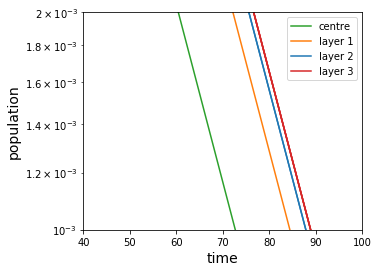

In [8]:
pops = qsw.measure.populations(file.series('A3_1.0even'))
font = 14
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
ax.set_yscale('log')

h = (2000)/float(2**16)

t = np.arange(0,2000 + h, h)

labels = ['centre', 'layer 1', 'layer 2', 'layer 3']
sec = 7000
f1 = True
f2 = True
f3 = True
f4 = True
f5 = True

for i in range(pops.shape[1]):
    if i == 0:
        if f1:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[0], label = labels[0])
            f1 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[0])
    elif (i == 1):
        if f2:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[1], label = labels[1])
            f2 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[1])
    elif (i == 2) or (i <= 3):
        if f3:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[2], label = labels[2])
            f3 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[2])
    elif (i == 4) or (i <= 7):
        if f4:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[3], label = labels[3])
            f4 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[3])
    elif i == 8:
        ax.plot(t[0:sec], pops[0:sec,i], c = color[4])
        indx += 1
    else:
        ax.plot(t[0:sec], pops[0:sec,i])

plt.xlabel(r'time',fontsize=font)
plt.ylabel(r'population',fontsize=font)
    
plt.legend()
ax.set_ylim(0.001,0.002)
ax.set_xlim(40,100)
plt.savefig("A3_1.0even_B.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)


No handles with labels found to put in legend.


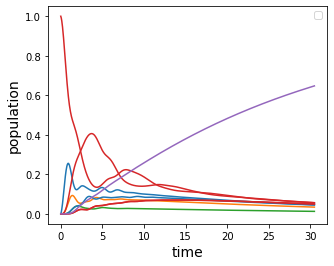

In [9]:
pops = qsw.measure.populations(file.series('A3_0.1even'))
font = 14
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
#ax.set_yscale('log')

h = (2000)/float(2**16)

t = np.arange(0,2000 + h, h)

labels = ['centre', 'layer 1', 'layer 2', 'layer 3']
sec = 1000
for i in range(pops.shape[1]):
    if i == 0:
        if f1:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[0], label = labels[0])
            f1 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[0])
    elif (i == 1):
        if f2:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[1], label = labels[1])
            f2 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[1])
    elif (i == 2) or (i <= 3):
        if f3:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[2], label = labels[2])
            f3 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[2])
    elif (i == 4) or (i <= 7):
        if f4:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[3], label = labels[3])
            f4 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[3])
    elif i == 8:
        ax.plot(t[0:sec], pops[0:sec,i], c = color[4])
        indx += 1
    else:
        ax.plot(t[0:sec], pops[0:sec,i])


plt.xlabel(r'time',fontsize=font)
plt.ylabel(r'population',fontsize=font)
    
plt.legend()
plt.savefig("A3_0.1even_A.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)


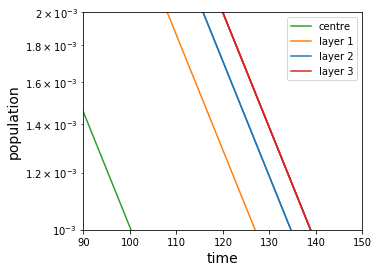

In [238]:
pops = qsw.measure.populations(file.series('A3_0.1even'))
font = 14
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
ax.set_yscale('log')

h = (2000)/float(2**16)

t = np.arange(0,2000 + h, h)

labels = ['centre', 'layer 1', 'layer 2', 'layer 3']
sec = 7000
f1 = True
f2 = True
f3 = True
f4 = True
f5 = True

for i in range(pops.shape[1]):
    if i == 0:
        if f1:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[0], label = labels[0])
            f1 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[0])
    elif (i == 1):
        if f2:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[1], label = labels[1])
            f2 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[1])
    elif (i == 2) or (i <= 3):
        if f3:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[2], label = labels[2])
            f3 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[2])
    elif (i == 4) or (i <= 7):
        if f4:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[3], label = labels[3])
            f4 = False
        else:
            ax.plot(t[0:sec], pops[0:sec,i], c = color[3])
    elif i == 29:
        ax.plot(t[0:sec], pops[0:sec,i], c = color[4])
        indx += 1
    else:
        ax.plot(t[0:sec], pops[0:sec,i])

plt.xlabel(r'time',fontsize=font)
plt.ylabel(r'population',fontsize=font)
    
plt.legend()
ax.set_ylim(0.001,0.002)
ax.set_xlim(90,150)
plt.savefig("A3_0.1even_B.jpeg", bbox_inches = 'tight', pad_inches = 0.2, dpi = 300)


/home/edric/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


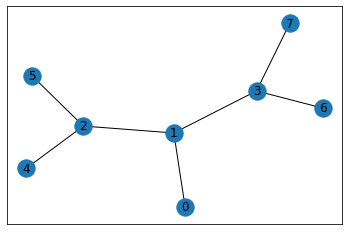

In [239]:
files = ['graphs/A1.mtx', 'graphs/A2.mtx', 'graphs/A3.mtx', 'graphs/D1.mtx', 'graphs/D2.mtx', 'graphs/D3.mtx']

G = sp.csr_matrix(mmread(files[2]))
graph = nx.from_scipy_sparse_matrix(G)
nx.draw_networkx(graph)
plt.show()

In [240]:
layout = nx.shell_layout(graph, nlist = [[0],[1, 2, 3, 4], [5, 6, 7, 8, 9, 10, 11, 12], [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,28]])

/home/edric/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


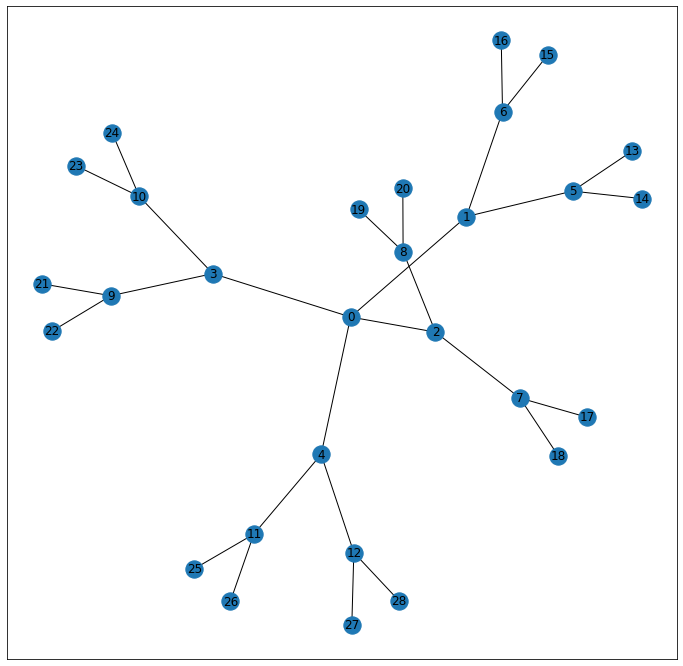

In [241]:
files = ['graphs/A1.mtx', 'graphs/A2.mtx', 'graphs/A3.mtx', 'graphs/D1.mtx', 'graphs/D2.mtx', 'graphs/D3.mtx']

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
labels = [0,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
G = sp.csr_matrix(mmread(files[5]))
graph = nx.from_scipy_sparse_matrix(G)
nx.draw_networkx(graph, layout = layout)
plt.show()

In [135]:
labels = [0,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]


In [136]:
len(labels)

29